# [**Comparaison des méthodes de décomposition croisée**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_8_cross_decomposition/plot_compare_cross_decomposition.ipynb)<br/>([_Compare cross decomposition methods_](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html))

Utilisation simple de divers algorithmes de décomposition croisée :
- [**`PLSCanonical`**](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSCanonical.html#sklearn.cross_decomposition.PLSCanonical)
- [**`PLSRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression), avec réponse multivariée, également appelée PLS2
- [**`PLSRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression), avec réponse univariée, également appelée PLS1
- [**`CCA`**](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html#sklearn.cross_decomposition.CCA)

Étant donné deux ensembles de données multivariés à deux dimensions qui covarient, `X` et `Y`, PLS extrait les "directions de covariance", c'est-à-dire les composantes de chaque ensemble de données qui expliquent la variance la plus partagée entre les deux ensembles de données. Cela est évident sur l'affichage de la **matrice de nuages de points** : les composantes 1 de l'ensemble de données `X` et de l'ensemble de données `Y` sont maximalement corrélées (les points se trouvent autour de la première diagonale). Cela est également vrai pour les composantes 2 des deux ensembles de données, cependant, la corrélation entre les ensembles de données pour différentes composantes est faible : le nuage de points est très sphérique.

# Modèle de variables latentes basé sur l'ensemble de données

In [1]:
import numpy as np

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[: n // 2]
Y_train = Y[: n // 2]
X_test = X[n // 2 :]
Y_test = Y[n // 2 :]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[ 1.    0.45 -0.08 -0.03]
 [ 0.45  1.   -0.07  0.  ]
 [-0.08 -0.07  1.    0.48]
 [-0.03  0.    0.48  1.  ]]
Corr(Y)
[[ 1.    0.47 -0.07 -0.1 ]
 [ 0.47  1.   -0.03 -0.07]
 [-0.07 -0.03  1.    0.53]
 [-0.1  -0.07  0.53  1.  ]]


# PLS canonique (symétrique)

## Transformer les données

In [2]:
from sklearn.cross_decomposition import PLSCanonical

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

## Nuage de points des scores

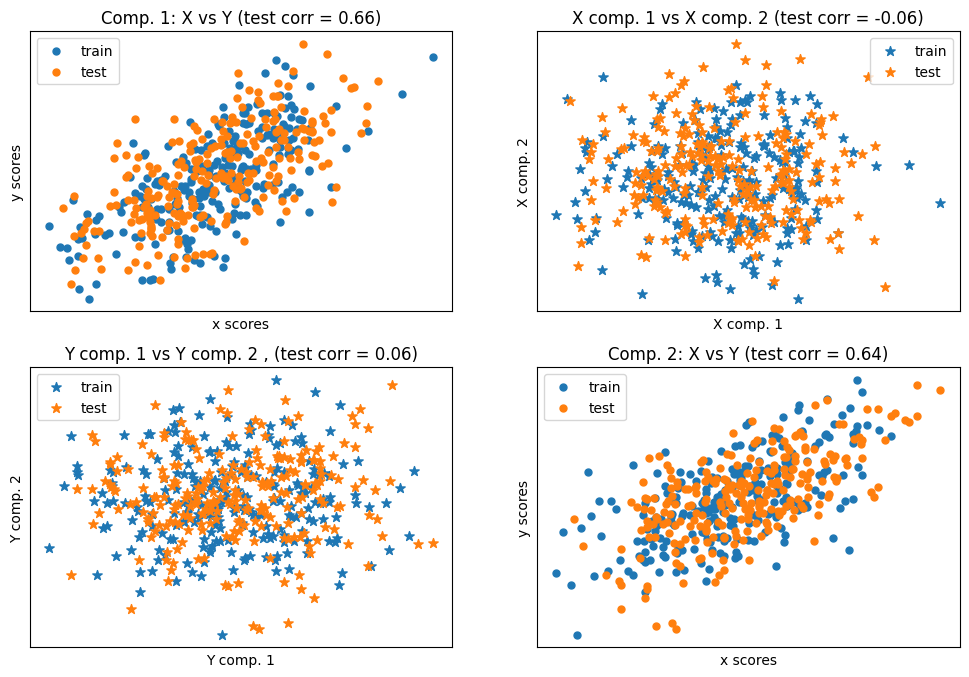

In [3]:
import matplotlib.pyplot as plt

# On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 1: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 2: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title(
    "X comp. 1 vs X comp. 2 (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title(
    "Y comp. 1 vs Y comp. 2 , (test corr = %.2f)"
    % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# Régression PLS, avec réponse multivariée, également appelée PLS2

In [4]:
from sklearn.cross_decomposition import PLSRegression

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   2.   0.1 -0.  -0.  -0.  -0.   0.   0.   0. ]
 [ 1.   2.1  0.   0.   0.  -0.   0.  -0.   0.   0. ]
 [ 1.   2.  -0.1  0.   0.  -0.  -0.   0.1  0.   0. ]]


array([[7.54950176, 7.59864968, 7.59008532],
       [5.61040868, 5.60927469, 5.67178237],
       [4.88212397, 4.88020519, 4.84645796],
       ...,
       [5.02455862, 4.95582343, 4.92848374],
       [6.17823875, 6.12349251, 6.0857945 ],
       [0.3008269 , 0.11549718, 0.01248835]])

# Régression PLS, avec réponse univariée, également appelée PLS1

In [5]:
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

Estimated betas
[[ 1.1  1.9 -0.   0.  -0.   0.   0.   0.  -0.  -0. ]]


# CCA (PLS mode B avec déflation symétrique)

In [6]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)